# Statistics Project: House Features & Sales Price

project goal: Identify the most important features of houses that affect the sale prices.

# 0. Getting started

import necessary packages and explore dataframe 'train':

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)


train = pd.read_csv('train.csv')

Explore the 'train' dataframe, using '.head' '.shape' '.dtypes' methods

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

In [4]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


# 1. Data cleaning

# 1.1 Explore the correlation coefficients 
...of the 'SalePrice' column with the other columns that have a numerical dataype

In [5]:
train1 = train.copy()

In [6]:
train1 = train1.drop(columns='SalePrice')

In [7]:
corr = train1.corrwith(train['SalePrice'])

In [8]:
corr.sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

# 1.2 Find out, if 'SalePrice' data is normally distributed
(using seaborn distplot)

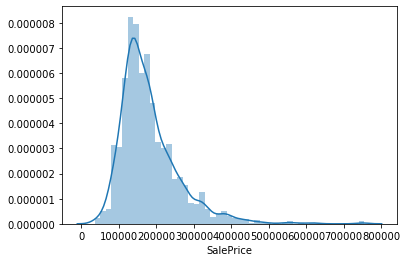

In [9]:
sns.distplot(train['SalePrice']);

The plot above shows that 'SalePrice' deviates from the normal distribution.

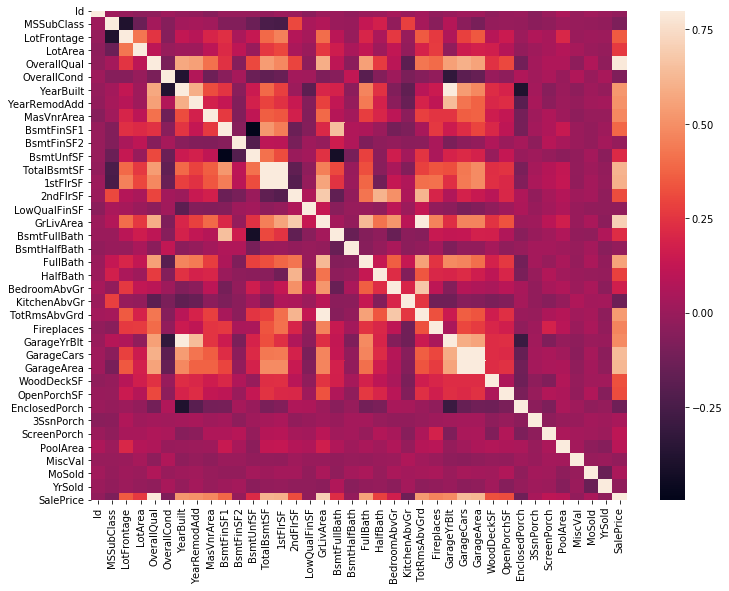

In [10]:
corr_matrix_train = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix_train, vmax=.8);

# 1.3 Drop columns where missing data > 30%

In [11]:
# here, I created a table to display how many NaN's are in each column (see column 'Total')
# and displayed the percentage of NaN'S (see column 'Total in %')

total = train.isnull().sum().sort_values(ascending=False)
total_percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
train_nans = pd.concat([total, total_percent], axis=1, keys=['Total', 'Total in %'])
train_nans.head(20)

#train.isnull().sum().sort_values(ascending=False).head(20)

,Total,Total in %
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [12]:
# now, I delete all columns where missing data > 30%, 
# as well as the column 'Id' which is not needed to evaluate the dependency on 'Sale price'

train = train.drop((train_nans[train_nans['Total in %'] > 0.30]).index,1)
train = train.drop(['Id'], axis=1)

Furthermore, I do also drop the columns "GarageCond", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual".<br>
<br>
They all have 81 missing values, which makes me think that those 81 values represent the properties without a garage.<br>
<br>
Additionally, I drop the column "GarageArea" which contains almost the same information as ""GarageCars" and has a lower correlation coefficient with "Sale price" (see chapter 1.3):<br>
<br>
GarageCars       0.640409<br>
GarageArea       0.623431<br>
<br>
As I still have the column "GarageCars", I have a garage-related column to analyze its statistical significance with the Sales Price.

In [13]:
train = train.drop(["GarageCond", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageArea"], axis=1)

In [14]:
len(train.columns)

69

# 1.4 Fill NaN values

First, I have a look at the columns containing NaN's using the '.isnull' method:

In [15]:
train.isnull().sum().sort_values(ascending=False)

LotFrontage      259
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Exterior2nd        0
RoofStyle          0
RoofMatl           0
Exterior1st        0
SalePrice          0
ExterQual          0
YearRemodAdd       0
Foundation         0
ExterCond          0
OverallCond        0
YearBuilt          0
OverallQual        0
HouseStyle         0
BldgType           0
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
LotConfig          0
Utilities          0
LandContour        0
LotShape           0
Street             0
LotArea            0
MSZoning           0
BsmtFinSF1         0
BsmtFinSF2         0
SaleCondition      0
TotRmsAbvGrd       0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF   

Then, I fill the NaN values for the following columns:<br>
<br>
"BsmtExposure", "BsmtFinType2", "BsmtFinType1", "BsmtCond", "BsmtQual", "MasVnrArea", "MasVnrType", "LotFrontage":

In [16]:
train.BsmtExposure = train.BsmtExposure.fillna('No')
train.BsmtFinType2 = train.BsmtFinType2.fillna('No')
train.BsmtFinType1 = train.BsmtFinType1.fillna('No')
train.BsmtCond = train.BsmtCond.fillna('No')
train.BsmtQual = train.BsmtQual.fillna('No')
train.MasVnrArea = train.MasVnrArea.fillna(0)
train.MasVnrType = train.MasVnrType.fillna('NA')
train.LotFrontage = train.LotFrontage.fillna(0)

Checking, if the code worked:

In [17]:
train.isnull().sum().sort_values(ascending=False).sum()

1

# 1.5  Convert categorical data into numerical

Now, I need to see which columns have categorical data:

In [18]:
train.select_dtypes(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Y,WD,Normal


It seems like there are a lot of 'object' type columns whith ranking scales,<br>
e.g. to rate the quality of some feature like a Pool:

"Ex" for Excellent,<br>
"Gd" for Good,<br>
"TA" for Average/Typical,<br>
"Fa" for Fair,<br>
"NA" for No Pool<br> 

I will turn the values in those columns into numbers, starting at 0 for the lowest rating.<br> 
Taking the example above, 0 replaces "NA" and 4 replaces "Ex".

In [19]:
train = train.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})

In [20]:
train.select_dtypes(include='object')
#train.dtypes

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtCond,Heating,CentralAir,Electrical,SaleType,SaleCondition
0,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,3,GasA,Y,SBrkr,WD,Normal
1,RL,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,3,GasA,Y,SBrkr,WD,Normal
2,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,3,GasA,Y,SBrkr,WD,Normal
3,RL,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,4,GasA,Y,SBrkr,WD,Abnorml
4,RL,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,3,GasA,Y,SBrkr,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,3,GasA,Y,SBrkr,WD,Normal
1456,RL,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,3,GasA,Y,SBrkr,WD,Normal
1457,RL,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,4,GasA,Y,SBrkr,WD,Normal
1458,RL,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,3,GasA,Y,FuseA,WD,Normal


There are still 20 columns with "object" type left. I looked at each categories of those columns individually, using ".value_counts".<br>
<br>
Whenever there was one category containing more than 70% of the data of the column, I decided to pass this dominant category the value 1 and all other categories the value 0.<br>
<br>
This helps me to turn even more categorical columns into numerical ones. However it reduces the level of information depths, as I can only analyze now, wheter having or not having this single category has impact on the sales price.

In [21]:
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [22]:
train['MSZoning'] = (train['MSZoning'] == 'RL').astype(int) #keeping RL (Residential Low Density) as 1, else 0
train['LandContour'] = (train['LandContour'] == 'Lvl').astype(int) #keeping Lvl (Near Flat/Level) as 1, else 0
train['LotConfig'] = (train['LotConfig'] == 'Inside').astype(int) #keeping Inside as 1, else 0
train['Condition1'] = (train['Condition1'] == 'Norm').astype(int) #keeping Norm as 1, else 0
train['Condition2'] = (train['Condition2'] == 'Norm').astype(int) #keeping Norm as 1, else 0
train['BldgType'] = (train['BldgType'] == '1Fam').astype(int) #keeping 1Fam (Single-family Detached) as 1, else 0
train['RoofStyle'] = (train['RoofStyle'] == 'Gable').astype(int) #keeping Gable as 1, else 0
train['RoofMatl'] = (train['RoofMatl'] == 'CompShg').astype(int) #keeping CompShg (Standard Composite Shingle) as 1, else 0
train['Heating'] = (train['Heating'] == 'GasA').astype(int) #keeping GasA (Gas forced warm air furnace) as 1, else 0
train['CentralAir'] = (train['CentralAir'] == 'Y').astype(int) #keeping Yes (when Central Air Condidioning exists) as 1, else 0
train['Electrical'] = (train['Electrical'] == 'SBrkr').astype(int) #keeping SBrkr (Standard Circuit Breakers & Romex) as 1, else 0
train['SaleType'] = (train['SaleType'] == 'WD').astype(int) #keeping WD (Warranty Deed - Conventional) as 1, else 0
train['SaleCondition'] = (train['SaleCondition'] == 'Normal').astype(int) #keeping Normal as 1, else 0

In [23]:
train.MSZoning.value_counts()

1    1151
0     309
Name: MSZoning, dtype: int64

In [24]:
train.select_dtypes(include='object')

,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtCond
0,CollgCr,2Story,VinylSd,VinylSd,BrkFace,PConc,3
1,Veenker,1Story,MetalSd,MetalSd,None,CBlock,3
2,CollgCr,2Story,VinylSd,VinylSd,BrkFace,PConc,3
3,Crawfor,2Story,Wd Sdng,Wd Shng,None,BrkTil,4
4,NoRidge,2Story,VinylSd,VinylSd,BrkFace,PConc,3
...,...,...,...,...,...,...,...
1455,Gilbert,2Story,VinylSd,VinylSd,None,PConc,3
1456,NWAmes,1Story,Plywood,Plywood,Stone,CBlock,3
1457,Crawfor,2Story,CemntBd,CmentBd,None,Stone,4
1458,NAmes,1Story,MetalSd,MetalSd,None,CBlock,3


... for some reason the column 'BsmtCond' is still in type 'object'. Here, I manually change the value type to int:

In [25]:
#train.BsmtCond.value_counts()
train['BsmtCond'] = train['BsmtCond'].astype(str).astype(int)

# 2. Field relationship scores

Again, I display the correlation coefficients between 'SalePrice' and all other all numeric columns:

In [28]:
train2 = train.copy()

In [29]:
corr2 = train2.corrwith(train['SalePrice'])

In [30]:
corr2 = corr2.sort_values(ascending=False)

In [32]:
corr2

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.361863
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
MSZoning         0.245063
Electrical       0.241896
PavedDrive       0.231357
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
LotFrontage      0.209624
BedroomAbvGr     0.168213
BldgType         0.137483
Condition1       0.112968
ScreenPorch      0.111447
Functional       0.107619
Heating          0.092529
PoolArea    

...Using the seaborn heatmap:

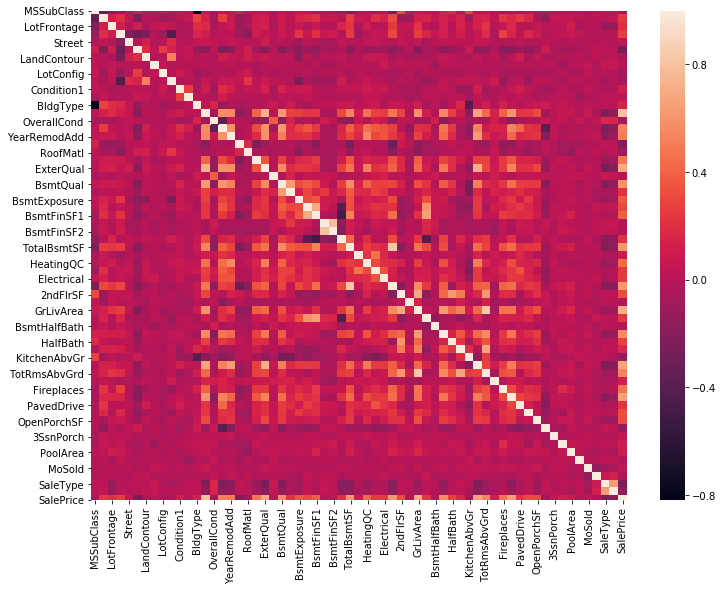

In [31]:
corr_matrix_train2 = train2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix_train2, vmax=1);

# 3. Statistical summary

To only present key findings, I decided to visualize the statistical summary for the top 10 variables,<br>
showing the highest, positive correlation coefficient with 'SalePrice':<br>
<br>
1. OverallQual<br>
2. GrLivArea<br>
3. ExterQual<br>
4. KitchenQual<br>
5. GarageCars<br>
6. TotalBsmtSF<br>
7. 1stFlrSF<br>
8. BsmtQual<br>
9. FullBath<br>
10. TotRmsAbvGrd<br>

In [55]:
# add constant column to train2 dataframe:

train2 = sm.add_constant(train2)

# run OLS on 'SalePrice' as dependent variable and top 10:

SP_OQ = sm.OLS(train2["SalePrice"],
               train2[["const", 
                       "OverallQual", 
                       "GrLivArea", 
                       "ExterQual", 
                       "KitchenQual", 
                       "GarageCars", 
                       "TotalBsmtSF",
                       "1stFlrSF",
                       "BsmtQual",
                       "FullBath",
                       "TotRmsAbvGrd"]]).fit()

print('Parameters:' ,"\n", SP_OQ.params, "\n")

print('R2: ', SP_OQ.rsquared)

Parameters: 
 const          -163150.809544
OverallQual      14327.034536
GrLivArea           45.177451
ExterQual        14521.254280
KitchenQual      14237.681814
GarageCars       13866.635889
TotalBsmtSF          5.625844
1stFlrSF            25.747508
BsmtQual          9692.712266
FullBath         -4022.859996
TotRmsAbvGrd       153.719756
dtype: float64 

R2:  0.786293757317772


In [56]:
SP_OQ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     533.1
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:19:09   Log-Likelihood:                -17418.
No. Observations:                1460   AIC:                         3.486e+04
Df Residuals:                    1449   BIC:                         3.492e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.632e+05   7569.328    -21.554      0.000   -1.78e+05   -1.48e+05
OverallQual   1.433e+04   1290.397     11.103      0.000    1.18e+04    1.69e+04
GrLivArea       45.1775      3.994     11.312      0.000      37.343      53.012
ExterQual     1.452e+04   2797.302      5.191      0.000    9034.060       2e+04
KitchenQual   1.424e+04   2222.170      6.407      0.000    9878.667    1.86e+04
GarageCars    1.387e+04   1715.169      8.085      0.000    1.05e+04    1.72e+04
TotalBsmtSF      5.6258      4.884      1.152      0.250      -3.955      15.207
1stFlrSF        25.7475      5.310      4.849      0.000      15.331      36.164
BsmtQual      9692.7123   1737.424      5.579      0.000    6284.576    1.31e+04
FullBath     -4022.8600   2443.140     -1.647      0.100   -8815.329     769.609
TotRmsAbvGrd   153.7198   1083.763      0.142      0.887   -1972.192    2279.631
==============================================================================
Omnibus:                      429.646   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44121.928
Skew:                          -0.223   Prob(JB):                         0.00
Kurtosis:                      29.928   Cond. No.                     1.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Summary sentences in Layman's terms
(at least, I tried)

For **7** out of 10 variables, there is enough statistical evidence to **reject the null hypothesis**,<br>
as their **p-value** is **below 5%**.<br>
<br>
<br>
<br>
One can say that for:<br>
<br>
• Overall material quality and finish of the house quality ("OverallQual"),<br>
• Above grade (ground) living area square feet ("GrLivArea"),<br>
• Exterior material quality ("ExterQual"),<br>
• Kitchen quality ("KitchenQual"),<br>
• Size of garage in car capacity ("GarageCars"),<br>
• First Floor square feet ("1stFlrSF"),<br>
• Height of basement quality ("BsmtQual")<br>
<br>
there is statistically enough evidence that they are **related to sales price**.<br>